UNEMPLOYMENT ANALYSIS WITH PYTHON

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
df = pd.read_csv('/content/Unemployment in India.csv')


In [4]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [5]:
df.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [6]:
df = df.dropna()

In [7]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [13]:
df.value_counts('Region')

Region
Andhra Pradesh      28
Karnataka           28
Uttar Pradesh       28
Tripura             28
Telangana           28
Tamil Nadu          28
Rajasthan           28
Punjab              28
Odisha              28
Maharashtra         28
Kerala              28
Madhya Pradesh      28
Jharkhand           28
Himachal Pradesh    28
Haryana             28
Gujarat             28
Delhi               28
Chhattisgarh        28
Bihar               28
West Bengal         28
Meghalaya           27
Uttarakhand         27
Assam               26
Puducherry          26
Goa                 24
Jammu & Kashmir     21
Sikkim              17
Chandigarh          12
Name: count, dtype: int64

In [8]:
df[' Date'] = pd.to_datetime(df[' Date'])
df[' Date'].info()

<class 'pandas.core.series.Series'>
Index: 740 entries, 0 to 753
Series name:  Date
Non-Null Count  Dtype         
--------------  -----         
740 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 11.6 KB


<ipython-input-8-438f8a8dbf34>:1: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[' Date'] = pd.to_datetime(df[' Date'])


In [9]:
# Bar Plot of Average Estimated Unemployment Rate
fig = px.bar(df, x = "Region", y = " Estimated Unemployment Rate (%)", color = "Region", title = "Average unemploment Rate")
fig.update_layout(xaxis = {'categoryorder':'total descending'})
fig.show()


In [10]:
# Bar Plot of people employed in each region
fig = px.bar(df, x = "Region", y = " Estimated Employed", color = "Region", title = "People employed in each region")
fig.update_layout(xaxis = {'categoryorder':'total descending'})
fig.show()

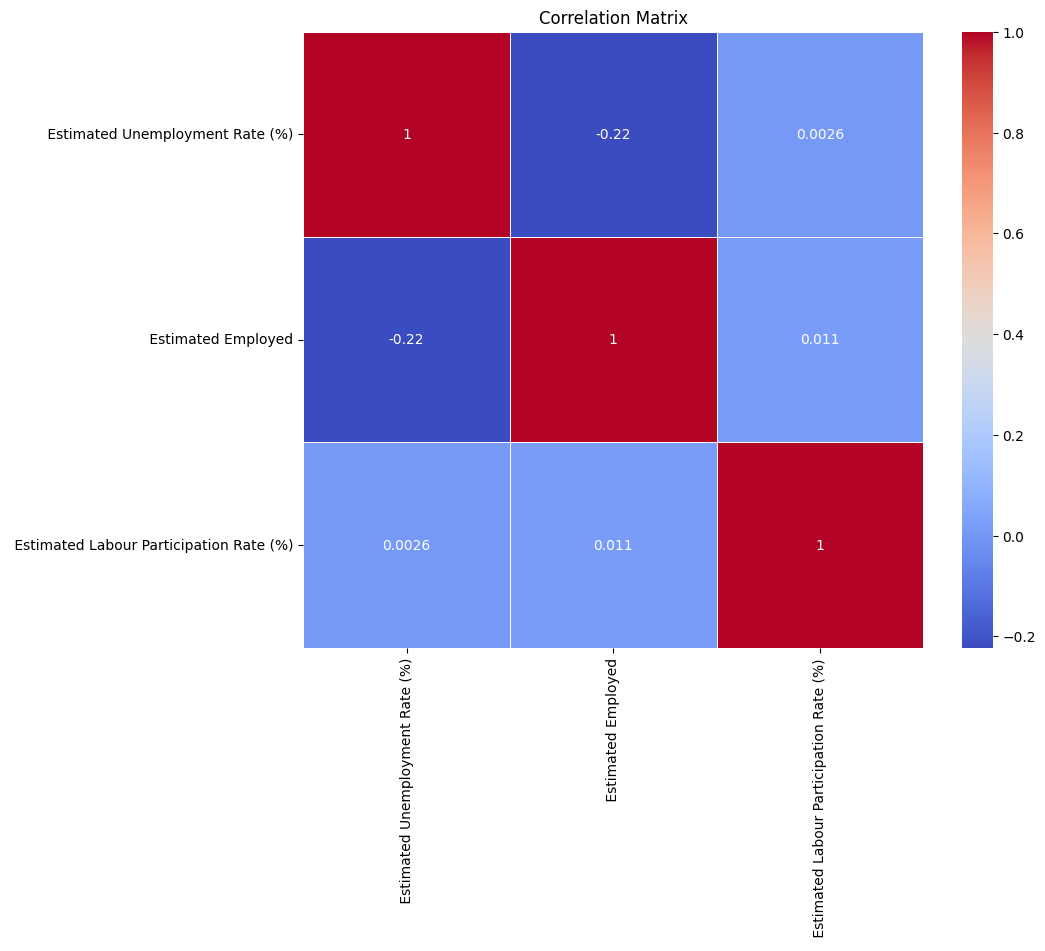

In [12]:
# Compute the correlation matrix
correlation_matrix = df.select_dtypes(include=['number']).corr()
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [14]:
avg_unemployement_over_time = df.groupby(' Date')[' Estimated Unemployment Rate (%)'].mean().sort_values(ascending=False).reset_index()
avg_unemployement_over_region = df.groupby('Region')[' Estimated Unemployment Rate (%)'].mean().sort_values(ascending=False).reset_index()
avg_people_employed_over_region = df.groupby('Region')[' Estimated Employed'].mean().sort_values(ascending=False).reset_index()
avg_labour_part_rate_over_region = df.groupby('Region')[' Estimated Labour Participation Rate (%)'].mean().sort_values(ascending=False).reset_index()
avg_unemployement_area_wise = df.groupby('Area')[' Estimated Unemployment Rate (%)'].mean().sort_values(ascending=False).reset_index()
highest_unemployement_rate_month = df.groupby(' Date')[' Estimated Unemployment Rate (%)'].max().sort_values(ascending=False).reset_index()

# print all the dataframes
print("Average Unemployment Rate over time\n", avg_unemployement_over_time)
print("\nAverage Unemployment Rate over Region\n", avg_unemployement_over_region)
print("\nAverage People employed over Region\n", avg_people_employed_over_region)
print("\nAverage Labour Participation Rate over Region\n", avg_labour_part_rate_over_region)
print("\nAverage Unemployment Rate over Area\n", avg_unemployement_area_wise)
print("\nHighest Unemployment Rate Month wise\n", highest_unemployement_rate_month)

Average Unemployment Rate over time
          Date   Estimated Unemployment Rate (%)
0  2020-05-31                         24.875294
1  2020-04-30                         23.641569
2  2020-06-30                         11.903600
3  2020-03-31                         10.700577
4  2020-02-29                          9.964717
5  2020-01-31                          9.950755
6  2019-10-31                          9.900909
7  2019-11-30                          9.868364
8  2019-08-31                          9.637925
9  2019-12-31                          9.497358
10 2019-06-30                          9.303333
11 2019-09-30                          9.051731
12 2019-07-31                          9.033889
13 2019-05-31                          8.874259

Average Unemployment Rate over Region
               Region   Estimated Unemployment Rate (%)
0            Tripura                         28.350357
1            Haryana                         26.283214
2          Jharkhand                  